# Try PyGMT online

This Jupyter lab environment has the latest PyGMT installed. You can try PyGMT with no extra install required.

**NOTE:** Any changes will be lost when the Jupyter lab is closed. Select "File"->"Download" to save notebooks to your computer.

To execute the code cells, select it and type `Shift + Enter` or click on the "Run" ► button in the menu bar. 

For tutorials and more examples, visit the official website: https://www.pygmt.org

## Loading the PyGMT package

You can load PyGMT by importing the `pygmt` Python package. Most GMT processing modules will be avialable as functions in this package. The plotting modules are methods of the `pygmt.Figure` class.

In [1]:
# Load the PyGMT package. This only needs to be run once
import pygmt

## Check the installed environment

Before starting, let's first check the current environment:

In [2]:
pygmt.show_versions()

PyGMT information:
  version: v0.14.2
System information:
  python: 3.13.2 | packaged by conda-forge | (main, Feb 14 2025, 08:27:06) [GCC 13.3.0]
  executable: /srv/conda/envs/notebook/bin/python
  machine: Linux-6.8.0-52-generic-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.2.3
  pandas: 2.2.3
  xarray: 2025.1.2
  netCDF4: 1.7.2
  packaging: 24.2
  contextily: None
  geopandas: 1.0.1
  IPython: 8.32.0
  pyarrow: None
  rioxarray: None
  gdal: 3.10.1
  ghostscript: 10.04.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /srv/conda/envs/notebook/share/gmt
  plugin dir: /srv/conda/envs/notebook/lib/gmt/plugins
  library path: /srv/conda/envs/notebook/lib/libgmt.so
  cores: 48
  grid layout: rows
  image layout: 
  binary version: 6.5.0


## Example 1

All figure generation in PyGMT is handled by the `pygmt.Figure` class. 
It has methods to add layers to your figure, like a basemap, coastlines, etc.

We start a new figure by creating an instance of `pygmt.Figure`:

In [3]:
fig = pygmt.Figure()

We add elements to the figure using its methods. For example, lets add the global coastlines to a 15 cm wide map using the Hammer projection (**H**). 
Our figure will also have a nice frame with automatic ticks.

In [4]:
fig.coast(region='g', projection='H15c', frame=True, land='lightbrown', water='lightblue')

You can see a preview of the figure directly in the Jupyter notebook using `fig.show()`.

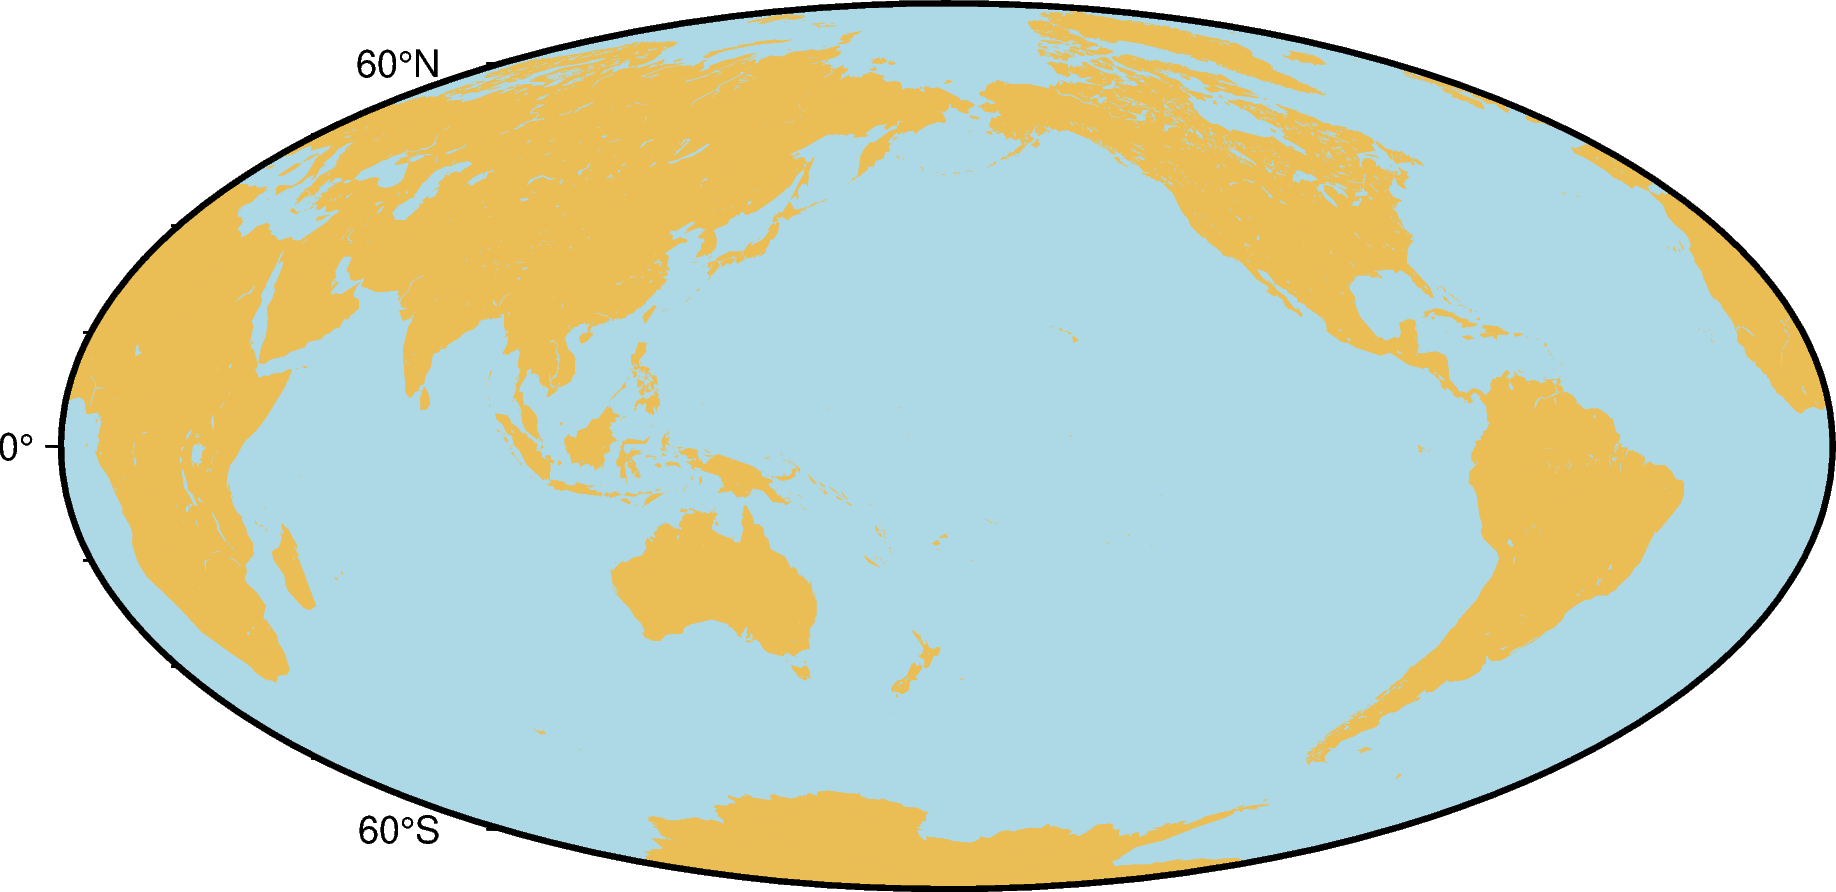

In [5]:
fig.show()

You can also save your figure in several graphics formats (e.g., png, pdf, jpg) using `fig.savefig()`:

In [6]:
fig.savefig("global.png")

## Example 2

gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.6 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [112K]: earth_relief_01d_p.grd


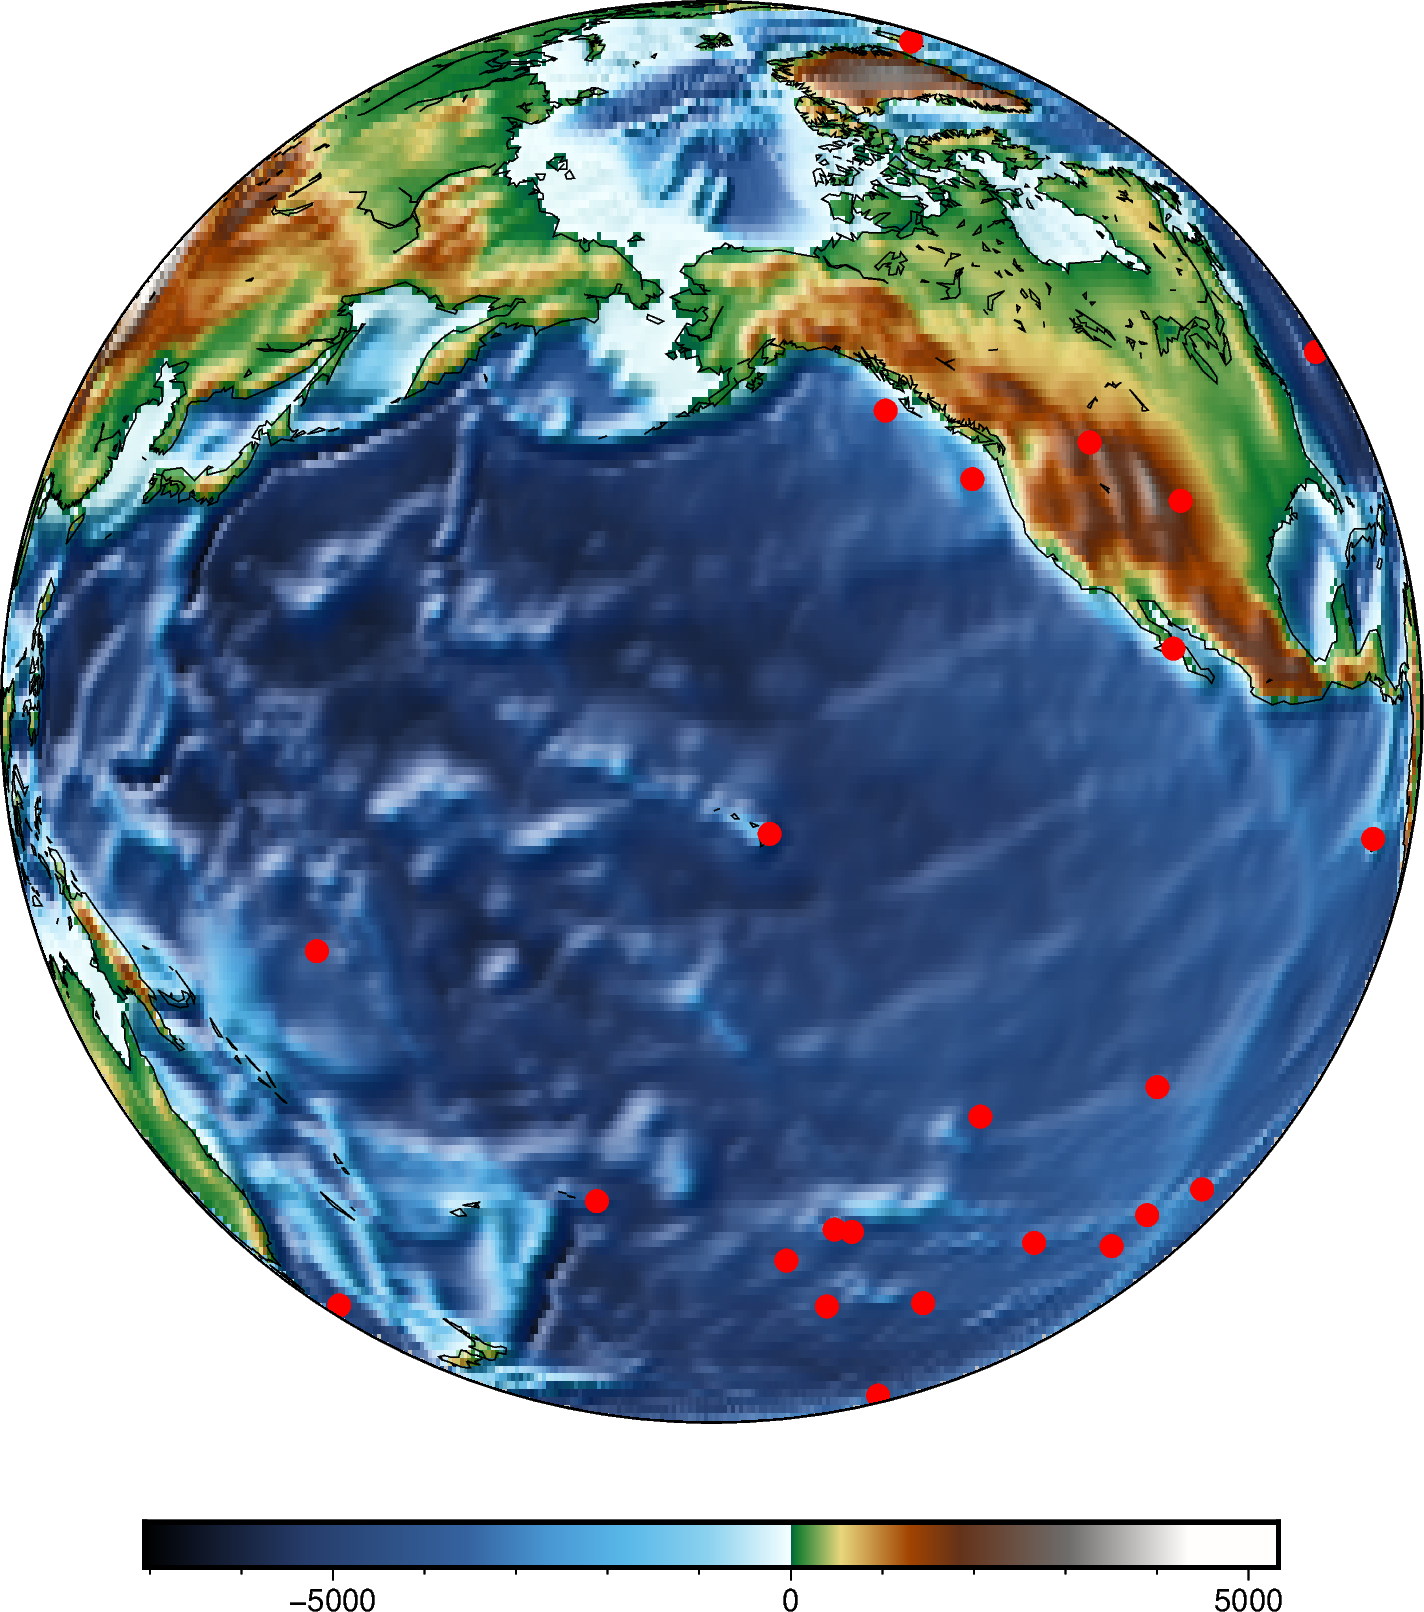

In [7]:
from pygmt.datasets import load_earth_relief

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G200/30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

## Experiment for yourself

Try running different things in the cells below or edit and rerun the cells above.

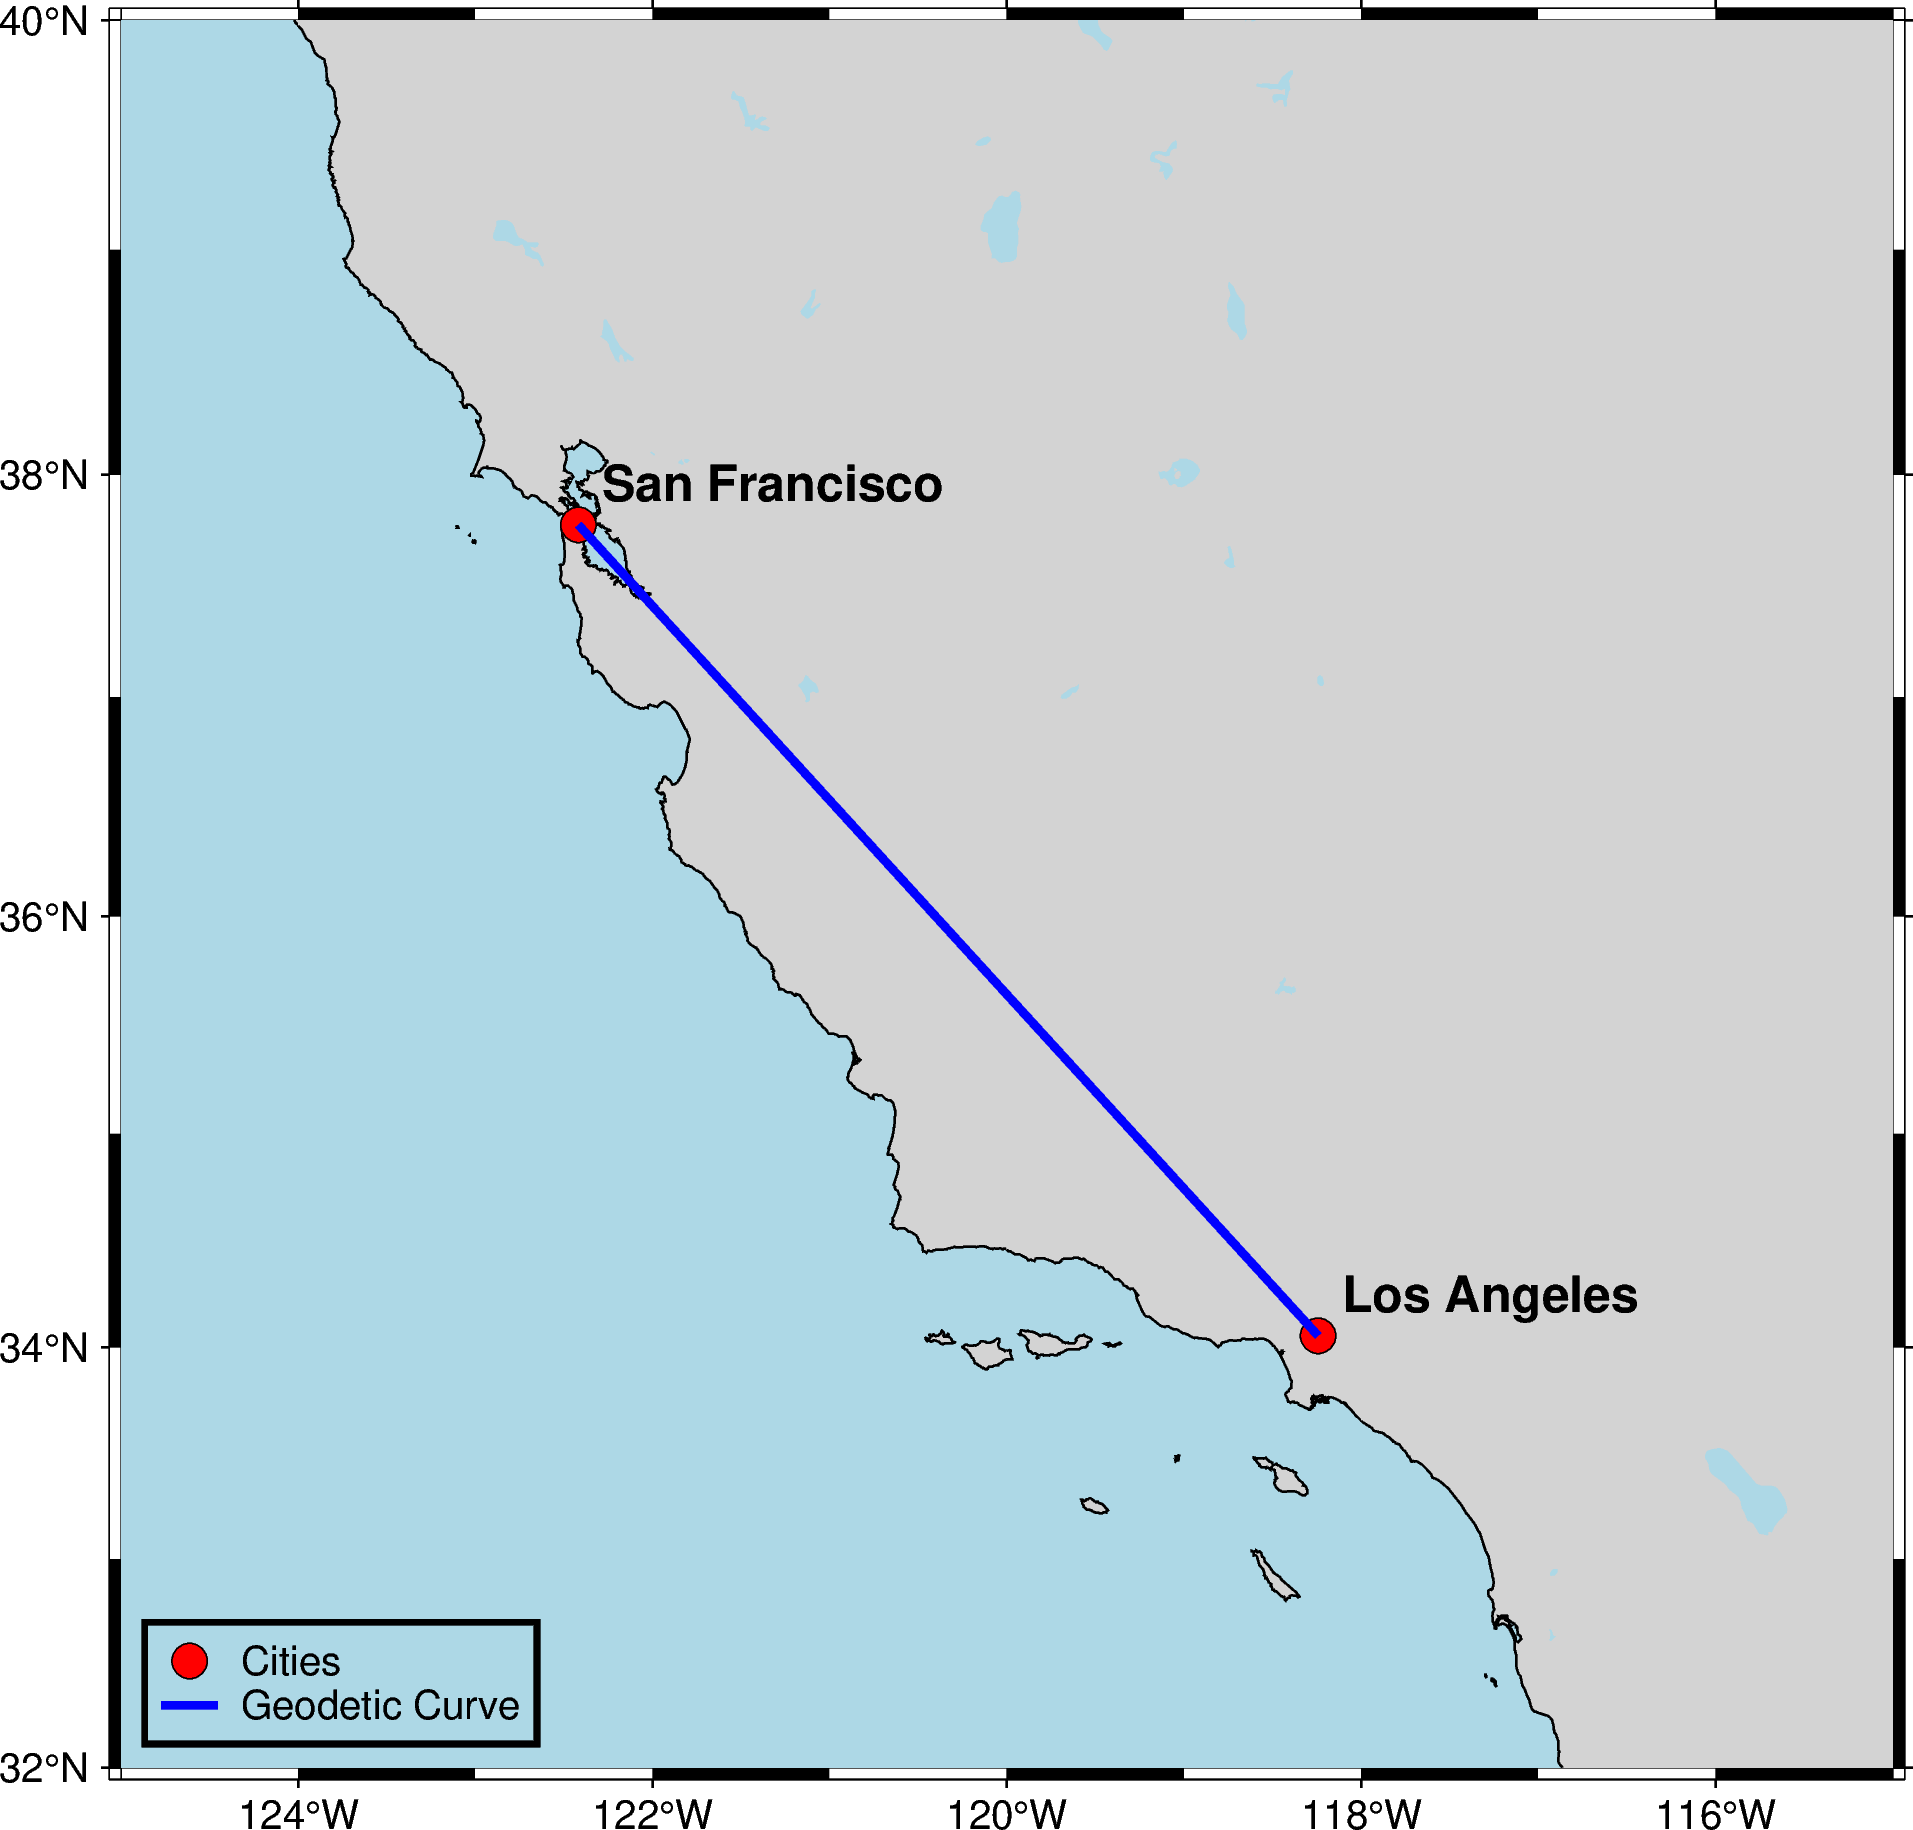

In [9]:
import pygmt

# Define the two points (latitude, longitude)
point1 = [37.7749, -122.4194]  # San Francisco, CA
point2 = [34.0522, -118.2437]  # Los Angeles, CA

# Create a PyGMT figure
fig = pygmt.Figure()

# Set the region to include both points
fig.basemap(region=[-125, -115, 32, 40], projection="M15c", frame=True)

# Plot the coastlines
fig.coast(shorelines="1/0.5p,black", land="lightgray", water="lightblue")

# Plot the two points
fig.plot(
    x=[point1[1], point2[1]],  # Longitudes
    y=[point1[0], point2[0]],  # Latitudes
    style="c0.3c",  # Circle with 0.3 cm diameter
    fill="red",  # Fill color
    pen="black",  # Outline color
    label="Cities",
)

# Plot the geodetic curve (great-circle path) between the two points
fig.plot(
    x=[point1[1], point2[1]],  # Longitudes
    y=[point1[0], point2[0]],  # Latitudes
    pen="2p,blue",  # Line thickness and color
    straight_line=True,  # Ensures a great-circle path
    label="Geodetic Curve",
)

# Add city names as text labels
fig.text(
    x=[point1[1], point2[1]],  # Longitudes
    y=[point1[0], point2[0]],  # Latitudes
    text=["San Francisco", "Los Angeles"],  # City names
    font="12p,Helvetica-Bold,black",  # Font size, type, and color
    justify="BL",  # Justify text to the bottom-left of the point
    offset="0.2c/0.2c",  # Offset the text from the point
)

# Add a legend
fig.legend(position="jBL+jBL+o0.2c", box=True)

# Save the figure
fig.savefig("geodetic_curve_map_with_labels.png", dpi=300)

# Display the figure
fig.show()

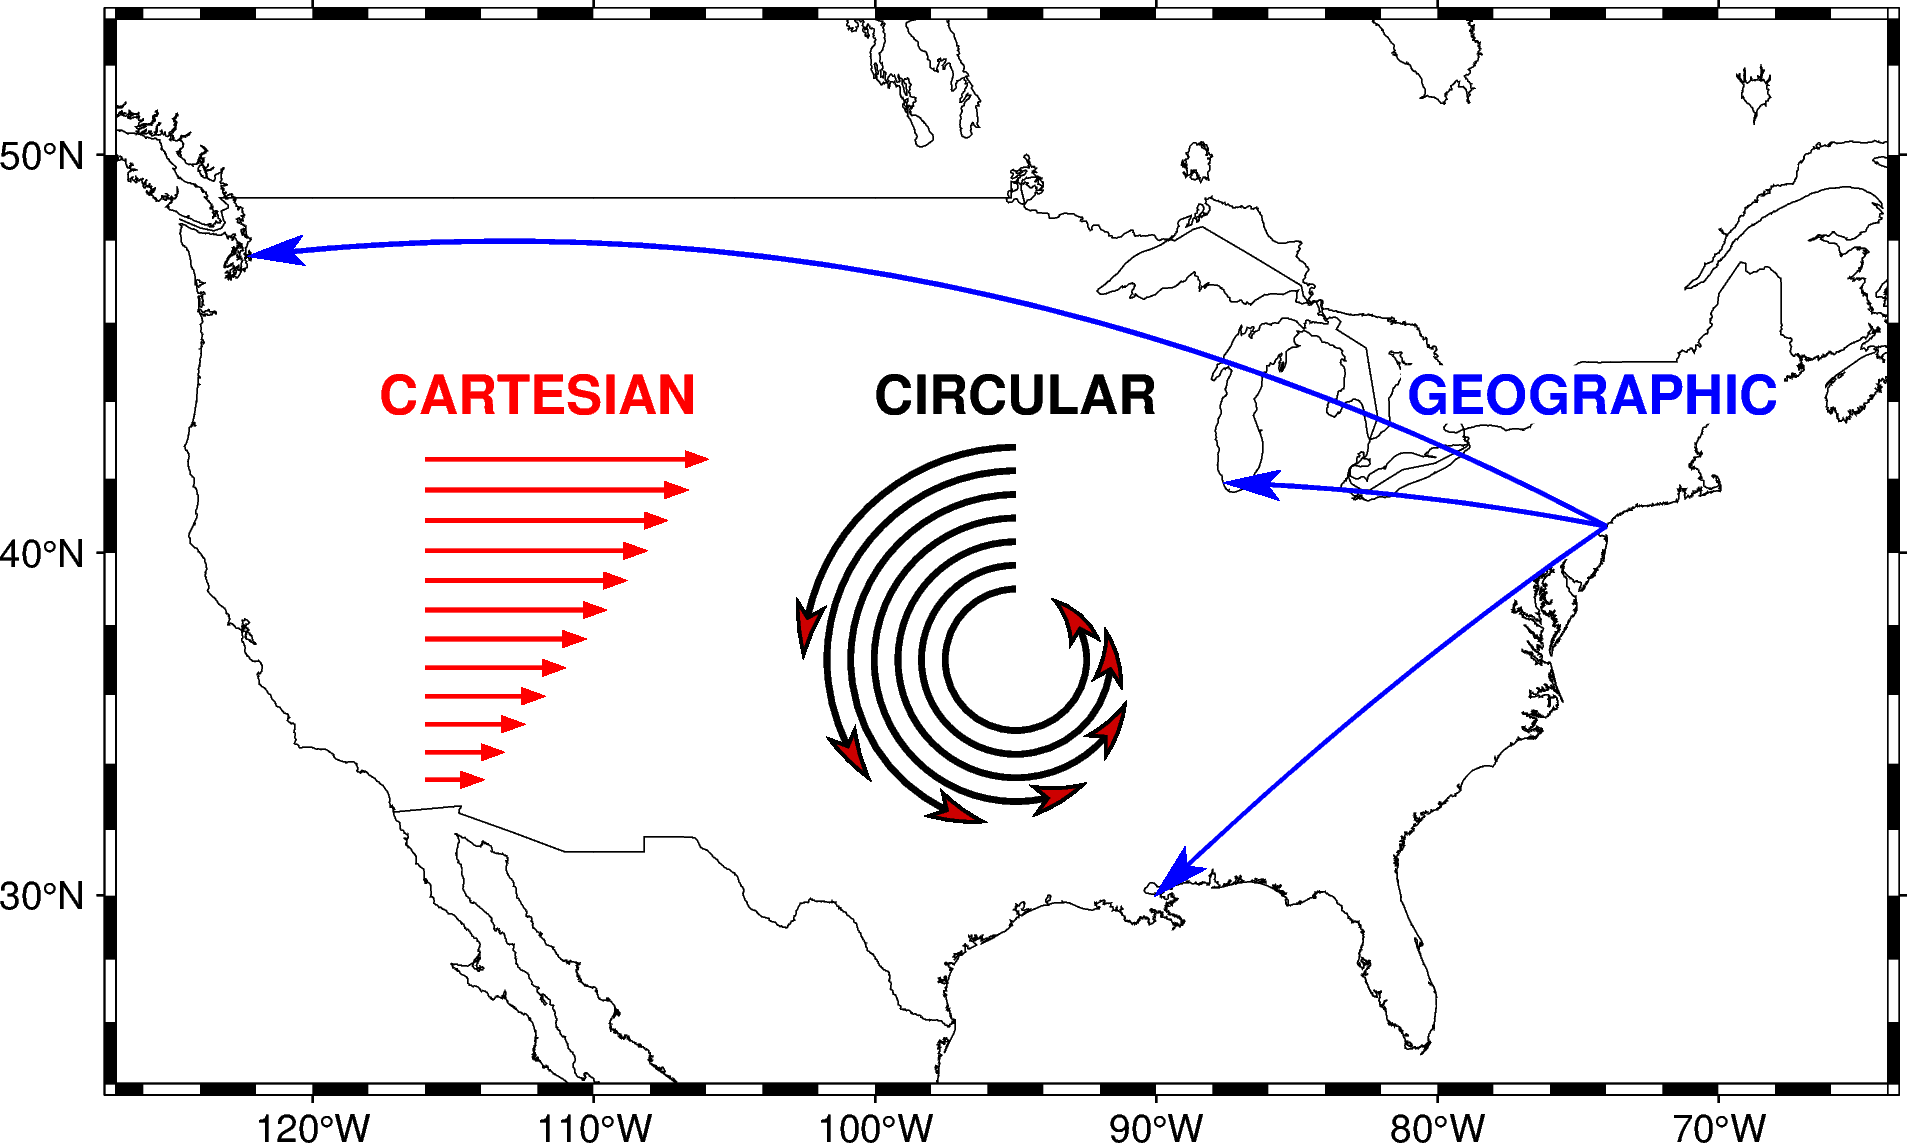

In [7]:
import numpy as np
import pygmt

# Create a plot with coast, Mercator projection (M) over the continental US
fig = pygmt.Figure()
fig.coast(
    region=[-127, -64, 24, 53],
    projection="M15c",
    frame=True,
    borders=1,
    area_thresh=4000,
    shorelines="0.25p,black",
)


# Left: plot 12 Cartesian vectors with different lengths
x = np.linspace(-116, -116, 12)  # x vector coordinates
y = np.linspace(33.5, 42.5, 12)  # y vector coordinates
direction = np.zeros(x.shape)  # direction of vectors
length = np.linspace(0.5, 2.4, 12)  # length of vectors
# Cartesian vectors (v) with red fill and pen (+g, +p), vector head at the end (+e), and
# 40 degree angle (+a) with no indentation for the vector head (+h)
style = "v0.2c+e+a40+gred+h0+p1p,red"
fig.plot(x=x, y=y, style=style, pen="1p,red", direction=[direction, length])
fig.text(text="CARTESIAN", x=-112, y=44.2, font="13p,Helvetica-Bold,red", fill="white")


# Middle: plot 7 math angle arcs with different radii
num = 7
x = np.full(num, -95)  # x coordinates of the center
y = np.full(num, 37)  # y coordinates of the center
radius = 1.8 - 0.2 * np.arange(0, num)  # radius
startdir = np.full(num, 90)  # start direction in degrees
stopdir = 180 + 40 * np.arange(0, num)  # stop direction in degrees
# data for circular vectors
data = np.column_stack([x, y, radius, startdir, stopdir])
arcstyle = "m0.5c+ea"  # Circular vector (m) with an arrow at the end
fig.plot(data=data, style=arcstyle, fill="red3", pen="1.5p,black")
fig.text(text="CIRCULAR", x=-95, y=44.2, font="13p,Helvetica-Bold,black", fill="white")


# Right: plot geographic vectors using endpoints
NYC = [-74.0060, 40.7128]
CHI = [-87.6298, 41.8781]
SEA = [-122.3321, 47.6062]
NO = [-90.0715, 29.9511]
# '=' means geographic vectors. With the modifier '+s', the input data should contain
# coordinates of start and end points
style = "=0.5c+s+e+a30+gblue+h0.5+p1p,blue"
data = np.array([NYC + CHI, NYC + SEA, NYC + NO])
fig.plot(data=data, style=style, pen="1.0p,blue")
fig.text(
    text="GEOGRAPHIC", x=-74.5, y=44.2, font="13p,Helvetica-Bold,blue", fill="white"
)
fig.show()

plot [WARNING]: Length <unit> e not supported - revert to default unit [cm]
plot [WARNING]: 0.5c+ not a valid number and may not be decoded properly.


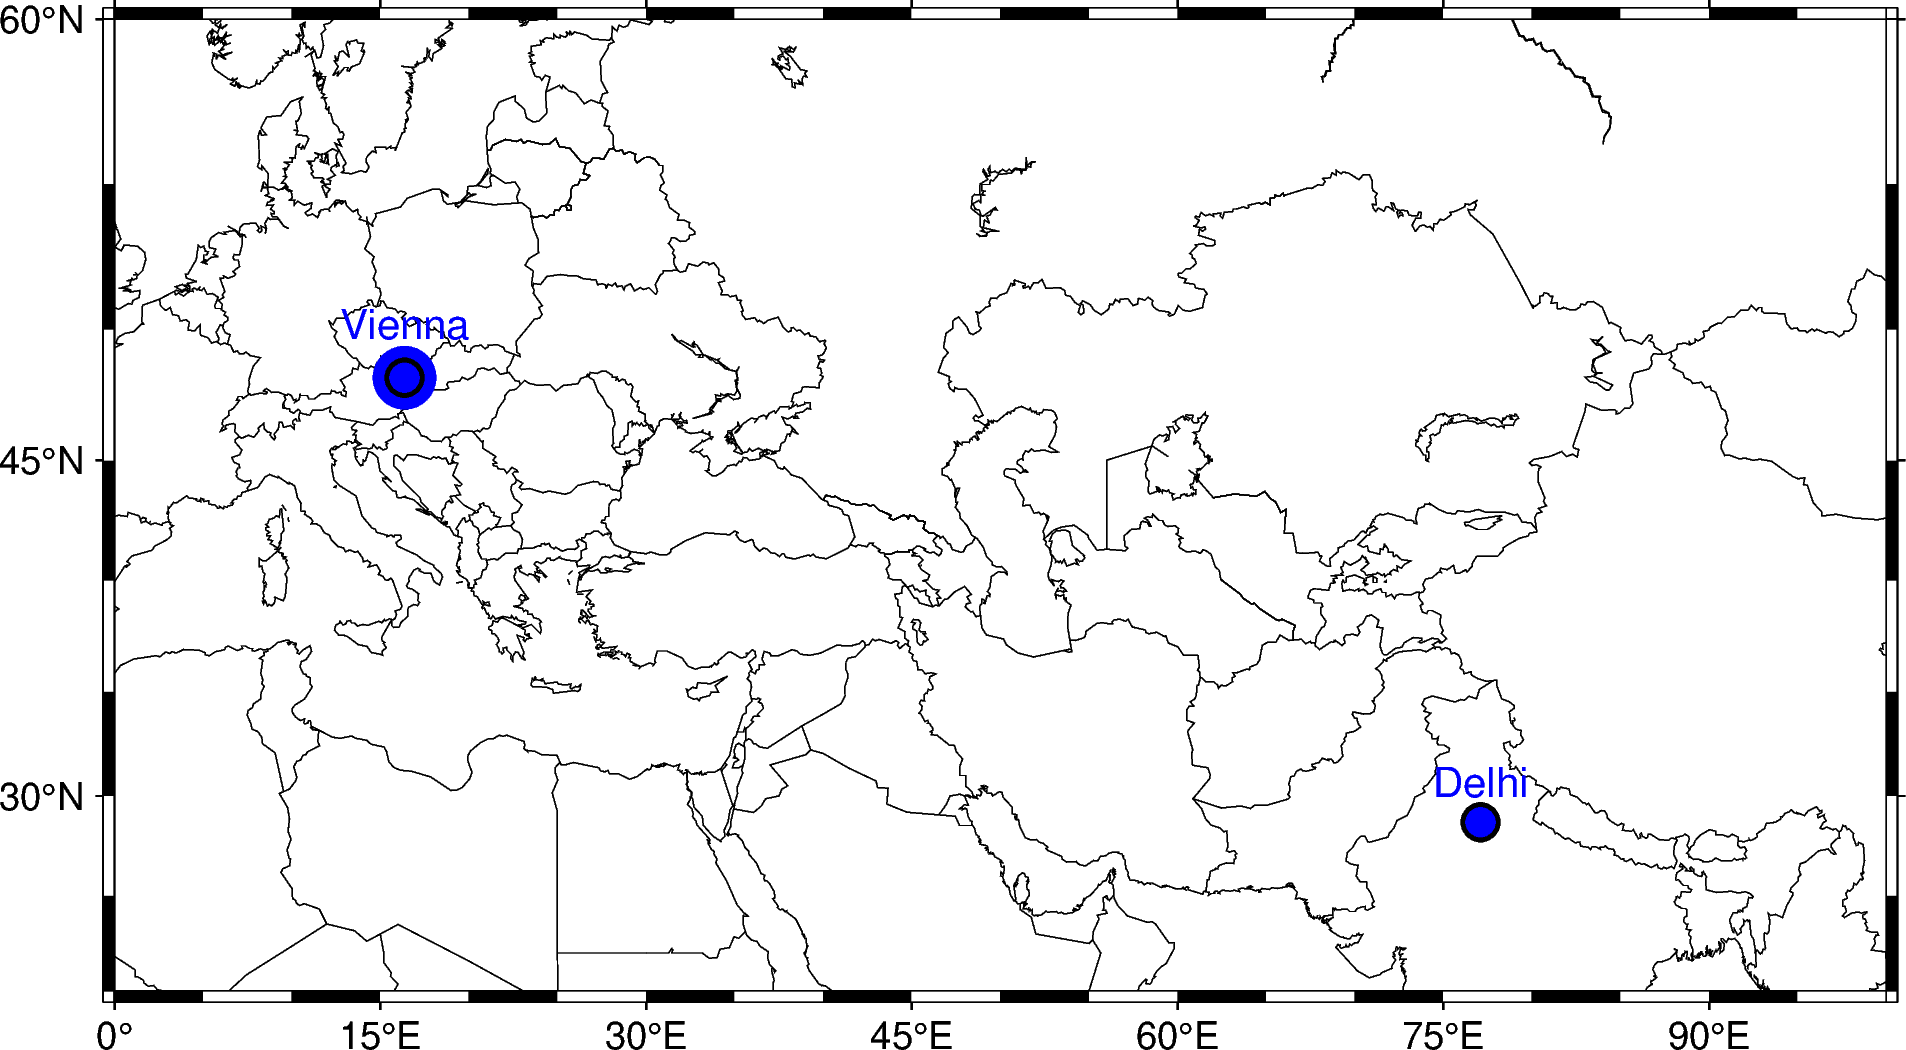

In [13]:
import numpy as np
import pygmt

# Create a plot with coast, Mercator projection (M)
fig = pygmt.Figure()
fig.coast(
    region=[0, 100, 20, 60],  # Region to show Vienna to Delhi
    projection="M15c",
    frame=True,
    borders=1,
    area_thresh=4000,
    shorelines="0.25p,black",
)

# Define coordinates for Vienna and Delhi
VIENNA = [16.3738, 48.2082]  # Vienna coordinates (lon, lat)
DELHI = [77.1025, 28.7041]   # Delhi coordinates (lon, lat)
data = np.array([VIENNA + DELHI])

# Plot geographic geodetic curve (great circle) between Vienna and Delhi
fig.plot(
    data=data,
    style="C0.5c+e",  # Geodetic curve with endpoints
    pen="1.0p,blue",
    fill="blue"
)

# Add markers for Vienna and Delhi
fig.plot(x=VIENNA[0], y=VIENNA[1], style="c0.3c", fill="blue", pen="1p,black")
fig.plot(x=DELHI[0], y=DELHI[1], style="c0.3c", fill="blue", pen="1p,black")

# Add labels for Vienna and Delhi
fig.text(text="Vienna", x=VIENNA[0], y=VIENNA[1]+2, font="10p,Helvetica,blue")
fig.text(text="Delhi", x=DELHI[0], y=DELHI[1]+2, font="10p,Helvetica,blue")

# Display the plot
fig.show()

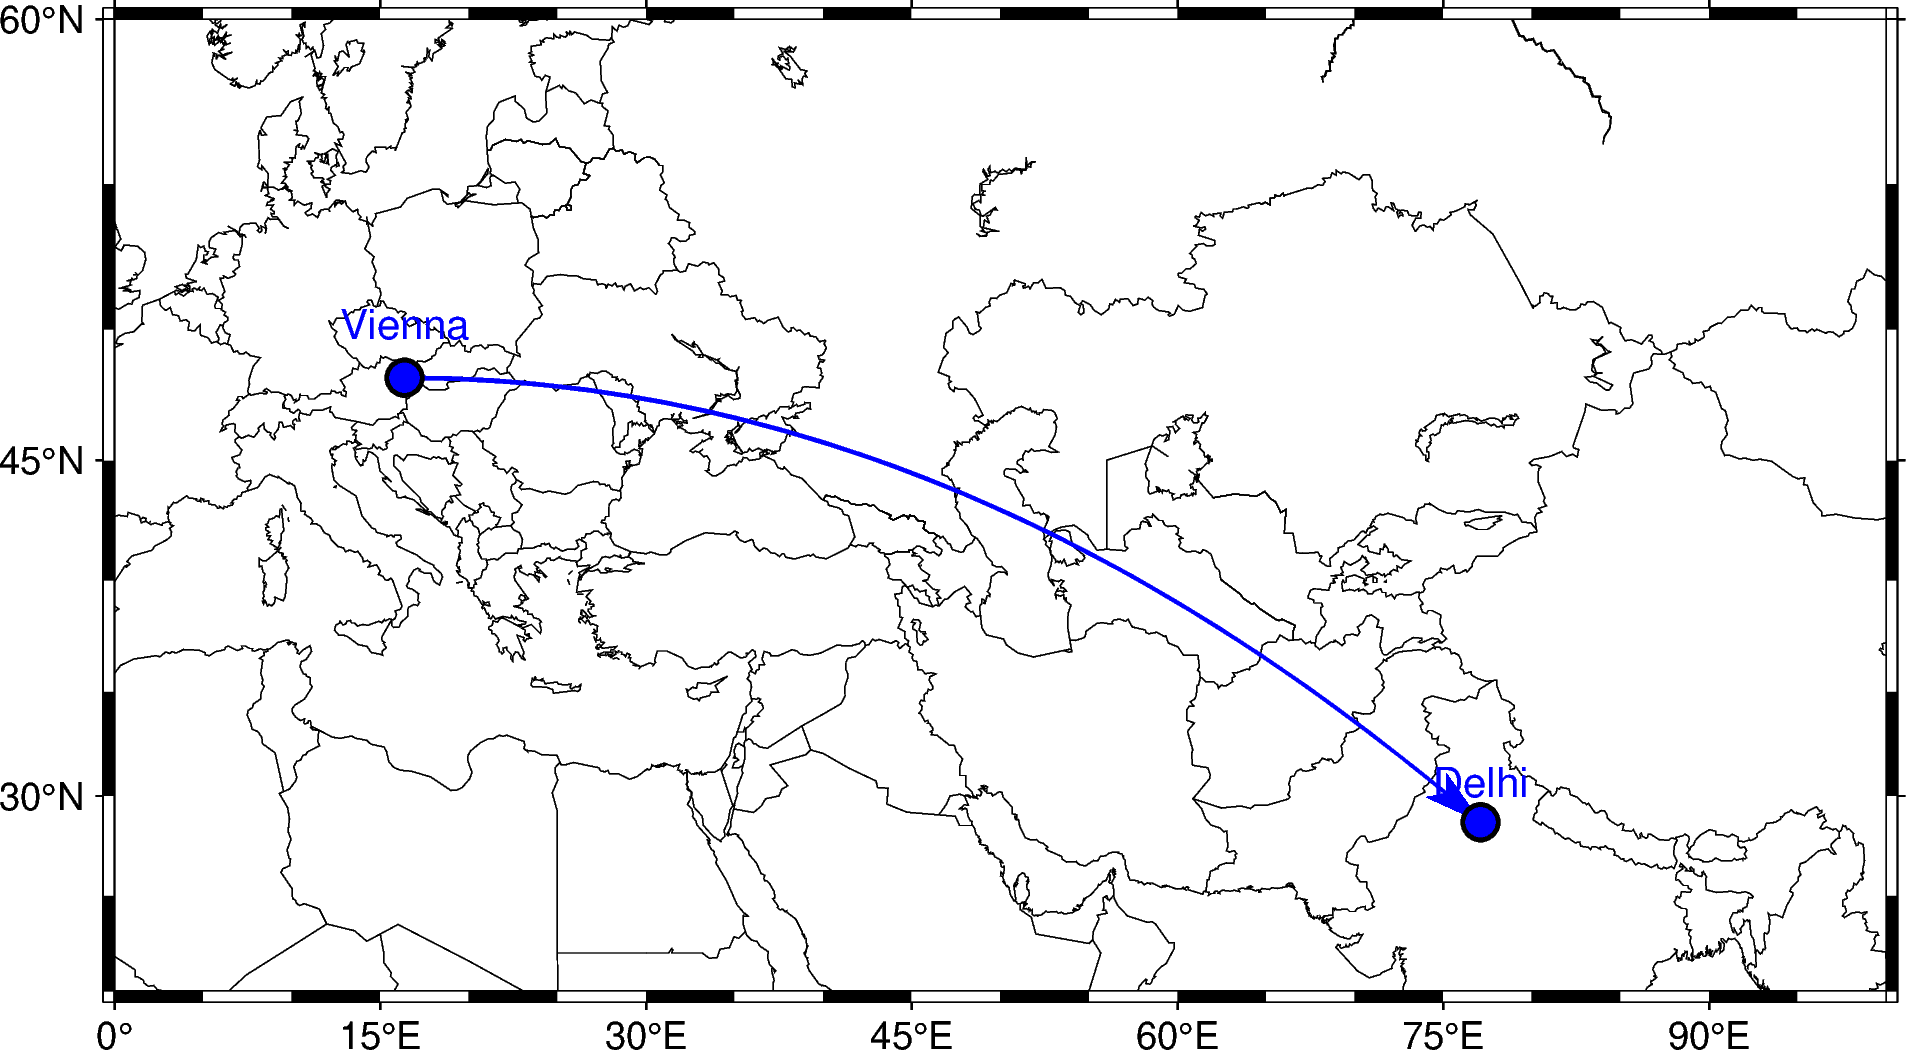

In [15]:
import numpy as np
import pygmt

# Create a plot with coast, Mercator projection (M)
fig = pygmt.Figure()
fig.coast(
    region=[0, 100, 20, 60],  # Region to show Vienna to Delhi
    projection="M15c",
    frame=True,
    borders=1,
    area_thresh=4000,
    shorelines="0.25p,black",
)

# Define coordinates for Vienna and Delhi
VIENNA = [16.3738, 48.2082]  # Vienna coordinates (lon, lat)
DELHI = [77.1025, 28.7041]   # Delhi coordinates (lon, lat)
data = np.array([VIENNA + DELHI])

# Plot geographic geodetic curve (great circle) between Vienna and Delhi
fig.plot(
    data=data,
    style="=0.5c+s+e+a30+gblue+h0.5+p1p,blue",  # Geographic curve with endpoints
    pen="1.0p,blue"
)

# Add markers for Vienna and Delhi
fig.plot(x=VIENNA[0], y=VIENNA[1], style="c0.3c", fill="blue", pen="1p,black")
fig.plot(x=DELHI[0], y=DELHI[1], style="c0.3c", fill="blue", pen="1p,black")

# Add labels for Vienna and Delhi
fig.text(text="Vienna", x=VIENNA[0], y=VIENNA[1]+2, font="10p,Helvetica,blue")
fig.text(text="Delhi", x=DELHI[0], y=DELHI[1]+2, font="10p,Helvetica,blue")

# Display the plot
fig.show()